# KERAS + WORD EMBEDDINGS ~ SPANISH

**1. IMPORT LIBRARIES**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from nltk import word_tokenize
from sklearn import preprocessing

**2. LOAD DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/thesiss/Spanish_merged_dataa.csv')

In [ ]:
data

,Unnamed: 0,Category,Text,clean_with_stopwords,final_clean
0,0,1,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",rae incluir el palabra lady en el diccionario ...,rae incluir palabra lady diccionario idioma es...
1,1,1,"La palabra ""haiga"", aceptada por la RAE La Rea...",el palabra haigar aceptado por el rae el real ...,palabra haigar aceptado rae real academia leng...
2,2,1,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,yordi rosado escribir y diseñar el nuevo libro...,yordi rosado escribir diseñar nuevo libro text...
3,3,0,UNAM capacitará a maestros para aprobar prueba...,unam capacitar a maestro para aprobar prueba p...,unam capacitar maestro aprobar prueba pis maxi...
4,4,1,Alerta: pretenden aprobar libros escolares con...,alerta pretender aprobar libro escolar con con...,alerta pretender aprobar libro escolar conteni...
...,...,...,...,...,...
2966,1995,0,El Consejo de Gobierno ha dado su visto bueno...,el consejo de gobierno haber dar su visto buen...,consejo gobierno haber dar visto bueno convoca...
2967,1996,0,Investigadores valencianos han desarrollado u...,investigador valenciano haber desarrollar uno ...,investigador valenciano haber desarrollar inno...
2968,1997,0,Los arrestados actuaban en coches y en establ...,el arrestado actuar en coche y en establecimie...,arrestado actuar coche establecimiento policia...
2969,1998,0,El Rey ha encargado este miércoles a Pedro Sá...,el rey haber encargar este miercoles a pedro s...,rey haber encargar miercoles pedro sanchez pre...


In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
data['final_clean'].isnull().sum()

0

In [ ]:
data['Category'].value_counts()

0    1491
1    1480
Name: Category, dtype: int64

**3.TOKENIZATION**

In [ ]:
import nltk  # don't forget to do this step everytime in colab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['Text_tokenised'] = data['final_clean'].apply(word_tokenize)

In [ ]:
data['length'] = data['Text_tokenised'].str.len()

In [ ]:
maxlen = data['length'].max()

In [ ]:
maxlen

1391

***4. CREATE OWN WORD EMBEDDINGS***

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# gensim needs a list of lists

source_list= []
for row in data['Text_tokenised']:
    source_list.append(row)

**Set parameters**

In [ ]:
# check parameters here :https://radimrehurek.com/gensim/models/word2vec.html


model = Word2Vec(source_list, size=300, window=2, sg=0, hs =1, sorted_vocab= 1)
# summarize the loaded model
print(model)

Word2Vec(vocab=6245, size=300, alpha=0.025)


**Save model to .txt format**

In [ ]:
# it is saved now in txt format, binary=False turns it to a .bin

model.wv.save_word2vec_format('spanish_wv.txt', binary=False)  

In [ ]:
# print the first few lines to check it out

a_file = open("spanish_wv.txt")
number_of_lines = 4

for i in range(number_of_lines):
    line = a_file.readline()
    print(line)

6245 300

ser 0.10153818 0.12661605 0.16080937 0.0009844686 0.21450384 0.04856365 -0.021166353 0.26905397 0.06658963 -0.16318412 -0.1625179 -0.027657846 0.14849472 0.11668578 -0.032390047 -0.09755139 0.12787439 0.0836408 -0.14761737 -0.119981185 -0.046740204 0.022147479 0.25771952 -0.38185284 0.06577132 -0.035139345 0.1649156 0.043565556 -0.08606051 0.0069543445 -0.031325873 -0.10707465 0.14548428 0.17075473 -0.11967901 -0.055153962 -0.084195636 -0.046661157 -0.002703477 0.12115153 0.2090461 0.35135922 -0.104126364 -0.02190879 -0.08783351 -0.22927238 0.11817537 -0.29852214 0.10319664 -0.06872168 0.08969848 -0.13781159 -0.17380236 0.26771414 -0.03901869 0.12763445 -0.072693415 0.26119867 0.08595239 0.045541428 0.1196441 0.20849925 -0.2577163 -0.1404626 -0.14976512 0.14875692 0.06234148 -0.18034248 0.27387536 -0.02973626 -0.23638207 -0.111907445 -0.14831416 -0.014239875 -0.18613344 -0.058386073 -0.15799987 0.18351741 0.35619786 -0.002015981 0.09150948 -0.06900603 0.0059258137 -0.04211401

**Create a dictionary**

In [ ]:
docs = data.final_clean.values
labels = data.Category.values

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional
from keras.layers import Activation

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1  # I add one because it starts counting from 0

In [ ]:
import itertools
# see a slice of our dictionary
dict(itertools.islice(t.word_index.items(), 10))

{'año': 7,
 'dar': 10,
 'decir': 8,
 'haber': 2,
 'hacer': 6,
 'mas': 3,
 'mexico': 9,
 'poder': 5,
 'ser': 1,
 'tener': 4}

***5. SPLIT THE DATA***

In [ ]:
# divide the data into train/validate

from sklearn.model_selection import train_test_split


sentences_train, sentences_valid, y_train, y_valid = train_test_split(
    docs, labels, test_size=0.20, random_state=1000)

***6. USE KERAS TOKENIZER TO CONVERT TRAIN AND VALID TO SEQUENCES***

In [ ]:
X_train = t.texts_to_sequences(sentences_train)
X_valid = t.texts_to_sequences(sentences_valid)

In [ ]:
print(sentences_train[2])
print(X_train[2])

tension espejo publico atravesar pequeño pantalla susanna griso pretender mantener debate ordenado educado mañana enero asesor equipo campaña donald trump españa roberto centeno haber poner faci
[2501, 7201, 42, 2604, 279, 1649, 23372, 12593, 702, 178, 541, 4698, 6025, 315, 470, 1509, 79, 105, 372, 102, 76, 2136, 12408, 2, 60, 23373]


In [ ]:
X_train[0]  #each word is assinged an index

[349,
 115,
 1077,
 123,
 3101,
 12388,
 9106,
 23316,
 3864,
 1974,
 522,
 23317,
 5450,
 5451,
 6244,
 7417,
 23318]

***7. POST-PADDING***

In [ ]:
import nltk  # don't forget to do this step everytime in colab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# pad documents to a max length 

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_valid = pad_sequences(X_valid, padding='post', maxlen=maxlen)

print(X_train[1, :])

[  96 2236 1844 ...    0    0    0]


In [ ]:
len(X_valid)

595

***8. LOAD THE WHOLE EMBEDDING INTO MEMORY***

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('spanish_wv.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 6246 word vectors.


***9. CREATE A WEIGHT MATRIX FOR WORDS IN TRAINING ARTICLES***

In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 300))  # create an empty numpy array which will be used as the embedding layer in our model with my dimensions 50 here
for word, i in t.word_index.items():  # go through our vocab integers and words
	embedding_vector = embeddings_index.get(word)  # find the word in the pretrained word vectors
	if embedding_vector is not None:  # if it is  not empty put it in our embedding matrix
		embedding_matrix[i] = embedding_vector


In [ ]:
from collections import Counter
Counter(y_valid)

Counter({0: 291, 1: 304})

***10. BUILD THE MODEL***

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam,SGD

model=Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Bidirectional(LSTM(100)))  # one BLSTM Layer with 100 neurons 
model.add(Dropout(0.3)) # DROPOUT LAYER
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam=Adam(learning_rate=0.0001)
model.compile(adam, loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1391, 300)         7335900   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              320800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 32)                6432      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,663,165
Trainable params: 327,265
Non-trainable params: 7,335,900
________________________________________

***11. TRAIN THE MODEL***

In [ ]:
# fit the model on the whole data
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_valid, y_valid),
                    batch_size=32)

Epoch 1/50
75/75 [==============================] - 34s 404ms/step - loss: 0.6932 - accuracy: 0.5130 - val_loss: 0.6907 - val_accuracy: 0.5546
Epoch 2/50
75/75 [==============================] - 29s 389ms/step - loss: 0.6890 - accuracy: 0.5522 - val_loss: 0.6859 - val_accuracy: 0.5664
Epoch 3/50
75/75 [==============================] - 29s 390ms/step - loss: 0.6679 - accuracy: 0.6195 - val_loss: 0.6484 - val_accuracy: 0.6487
Epoch 4/50
75/75 [==============================] - 29s 389ms/step - loss: 0.6672 - accuracy: 0.5943 - val_loss: 0.6834 - val_accuracy: 0.5546
Epoch 5/50
75/75 [==============================] - 29s 389ms/step - loss: 0.6634 - accuracy: 0.6279 - val_loss: 0.6630 - val_accuracy: 0.6437
Epoch 6/50
75/75 [==============================] - 29s 389ms/step - loss: 0.6430 - accuracy: 0.6519 - val_loss: 0.6504 - val_accuracy: 0.6487
Epoch 7/50
75/75 [==============================] - 29s 389ms/step - loss: 0.6307 - accuracy: 0.6658 - val_loss: 0.6437 - val_accuracy: 0.6521

**GRAPHIC REPRESENTATION**

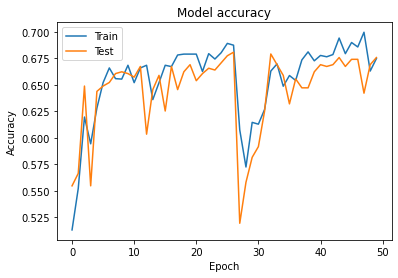

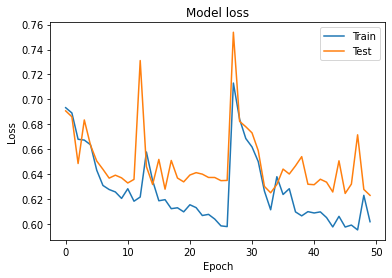

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

**METRICS**

In [ ]:
y_pred_valid=(model.predict(X_valid)>0.5).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_valid,y_pred_valid))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       291
           1       0.69      0.71      0.70       304

    accuracy                           0.69       595
   macro avg       0.69      0.69      0.69       595
weighted avg       0.69      0.69      0.69       595



In [ ]:
confusion_matrix(y_valid,y_pred_valid)


array([[193,  98],
       [ 89, 215]])

# **ATTEMPTING TO SOLVE OVERFITTING WITH L2 REGULARIZATION TECHNIQUES AND EARLY STOPPING**

***CREATING EMBEDDINGS OF 100 DIMENSIONS***

In [ ]:
model2 = Word2Vec(source_list, size=100, window=2, sg=0, hs =1, sorted_vocab= 1)
# summarize the loaded model
print(model2)

Word2Vec(vocab=6245, size=100, alpha=0.025)


In [ ]:
# it is saved now in txt format, binary=False turns it to a .bin

model2.wv.save_word2vec_format('spanish2_wv.txt', binary=False)  

In [ ]:
# load the whole embedding into memory
embeddings_index2 = dict()
f = open('spanish2_wv.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index2))


Loaded 6246 word vectors.


In [ ]:
# create a weight matrix for words in training docs
embedding_matrix2 = zeros((vocab_size, 100))  # create an empty numpy array which will be used as the embedding layer in our model with my dimensions 50 here
for word, i in t.word_index.items():  # go through our vocab integers and words
	embedding_vector = embeddings_index2.get(word)  # find the word in the pretrained word vectors
	if embedding_vector is not None:  # if it is  not empty put it in our embedding matrix
		embedding_matrix2[i] = embedding_vector


**BUILDING THE SECOND MODEL WITH L2 REGULARIZATION**

In [ ]:
from keras.regularizers import l2

import tensorflow as tf
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam,SGD

model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam=Adam(learning_rate=0.0001)
model2.compile(optimizer=adam,
               loss='binary_crossentropy',
               metrics=['accuracy'])
model2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 1391, 100)         2445300   
                                                                 
 bidirectional_20 (Bidirecti  (None, 200)              160800    
 onal)                                                           
                                                                 
 dropout_26 (Dropout)        (None, 200)               0         
                                                                 
 dense_45 (Dense)            (None, 32)                6432      
                                                                 
 dropout_27 (Dropout)        (None, 32)                0         
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                     

**TRAIN THE MODEL WITH EARLY STOPPING**

In [ ]:
from keras.callbacks import EarlyStopping  # THE MODEL IS STILL OVERFITTED
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) 
# fit the model on the whole data
history2 = model2.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_valid, y_valid),
                    batch_size=128,
                    callbacks=[es])# adding early stopping)

Epoch 1/100
19/19 [==============================] - 15s 555ms/step - loss: 1.2412 - accuracy: 0.5042 - val_loss: 1.2307 - val_accuracy: 0.5681
Epoch 2/100
19/19 [==============================] - 9s 502ms/step - loss: 1.2216 - accuracy: 0.5278 - val_loss: 1.2117 - val_accuracy: 0.5227
Epoch 3/100
19/19 [==============================] - 9s 502ms/step - loss: 1.2029 - accuracy: 0.5307 - val_loss: 1.1933 - val_accuracy: 0.5529
Epoch 4/100
19/19 [==============================] - 9s 501ms/step - loss: 1.1838 - accuracy: 0.5682 - val_loss: 1.1751 - val_accuracy: 0.5244
Epoch 5/100
19/19 [==============================] - 9s 501ms/step - loss: 1.1650 - accuracy: 0.5484 - val_loss: 1.1569 - val_accuracy: 0.5496
Epoch 6/100
19/19 [==============================] - 9s 500ms/step - loss: 1.1444 - accuracy: 0.5787 - val_loss: 1.1372 - val_accuracy: 0.5765
Epoch 7/100
19/19 [==============================] - 9s 502ms/step - loss: 1.1184 - accuracy: 0.6987 - val_loss: 1.1701 - val_accuracy: 0.519

***12. GRAPHIC ILLUSTRATION***

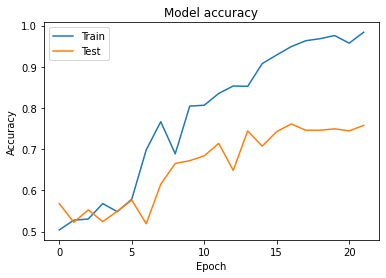

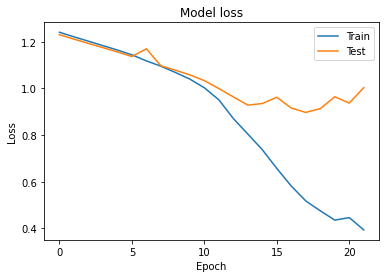

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

***13. METRICS***

In [ ]:
y_pred_valid2=(model2.predict(X_valid)>0.5).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_valid,y_pred_valid2))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       291
           1       0.77      0.76      0.76       304

    accuracy                           0.76       595
   macro avg       0.76      0.76      0.76       595
weighted avg       0.76      0.76      0.76       595



In [ ]:
confusion_matrix(y_valid,y_pred_valid2)

array([[221,  70],
       [ 74, 230]])

In [ ]:
model2.save('model2.h5')

In [ ]:
model3=load_model('model2.h5')